In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('soil_measures.csv')

In [4]:
df.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [5]:
df.columns

Index(['N', 'P', 'K', 'ph', 'crop'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


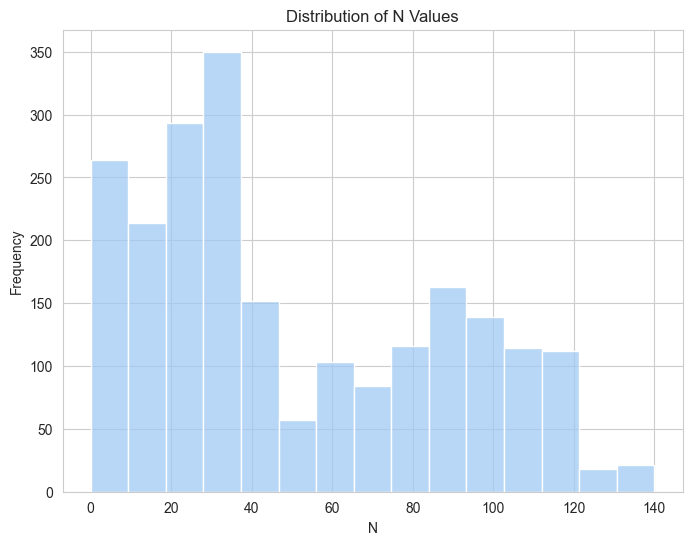

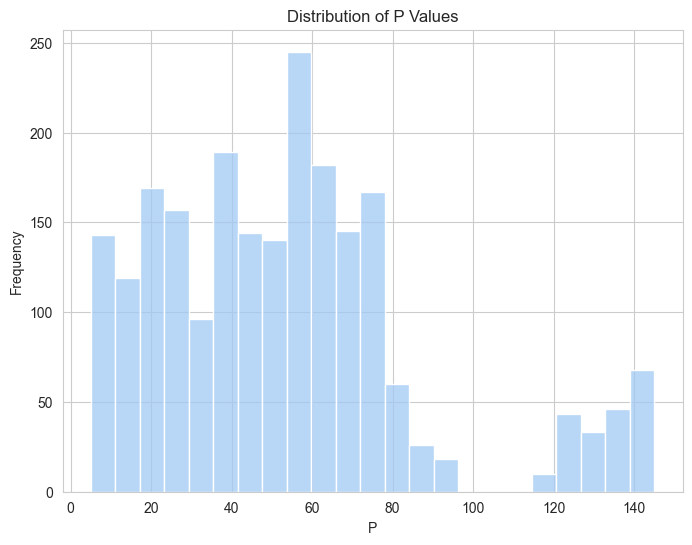

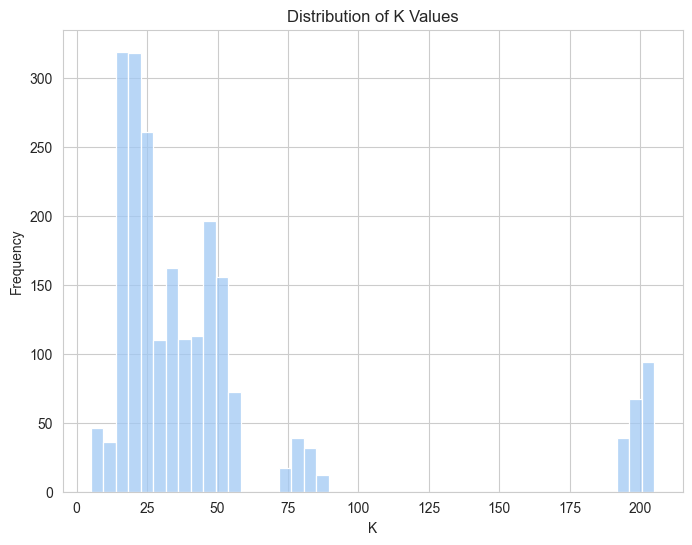

In [17]:
# Set the style
sns.set_style('whitegrid')

# Set the color palette
sns.set_palette('pastel')

# Set the figure size
plt.figure(figsize=(8, 6))

# 1. Histogram for N
sns.histplot(data=df, x='N')
plt.title('Distribution of N Values')
plt.xlabel('N')
plt.ylabel('Frequency')
plt.show()

# 2. Histogram for P
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='P')
plt.title('Distribution of P Values')
plt.xlabel('P')
plt.ylabel('Frequency')
plt.show()

# 3. Histogram for K
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='K')
plt.title('Distribution of K Values')
plt.xlabel('K')
plt.ylabel('Frequency')
plt.show()


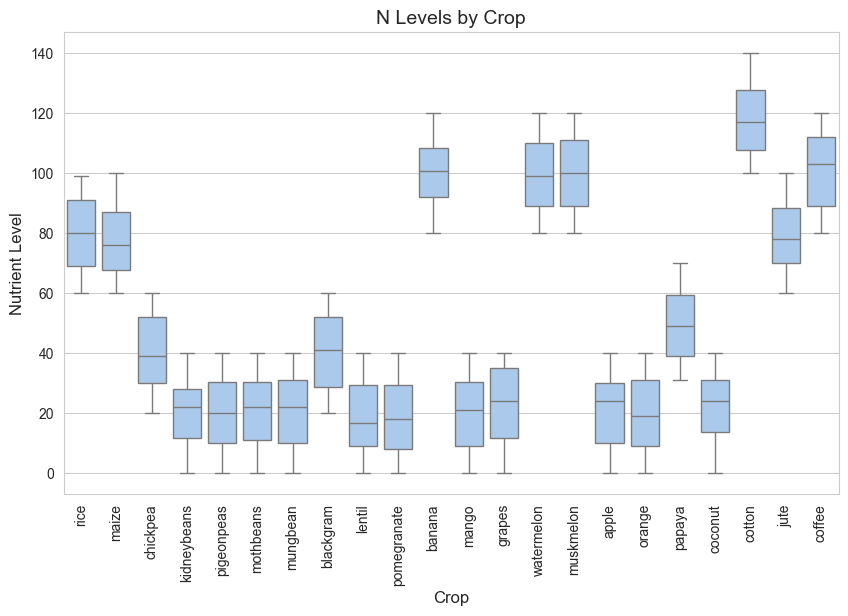

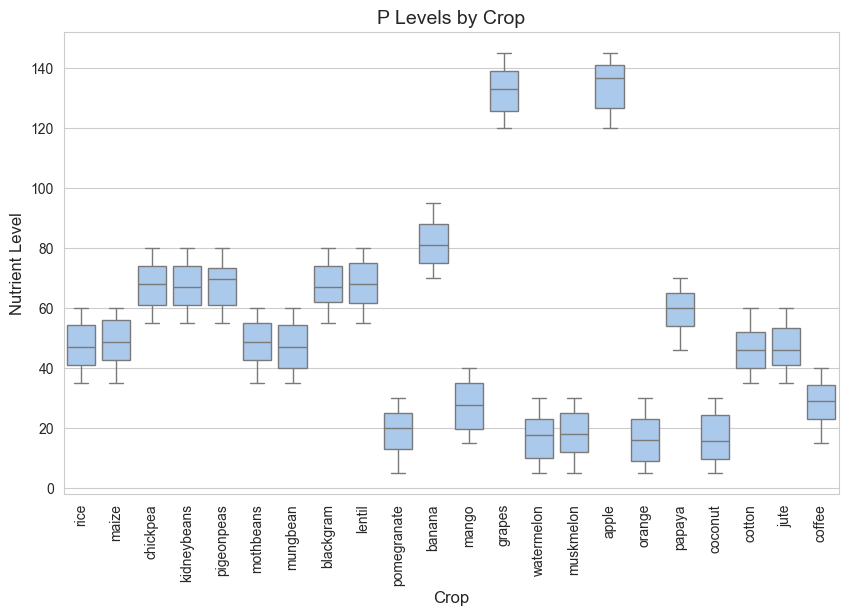

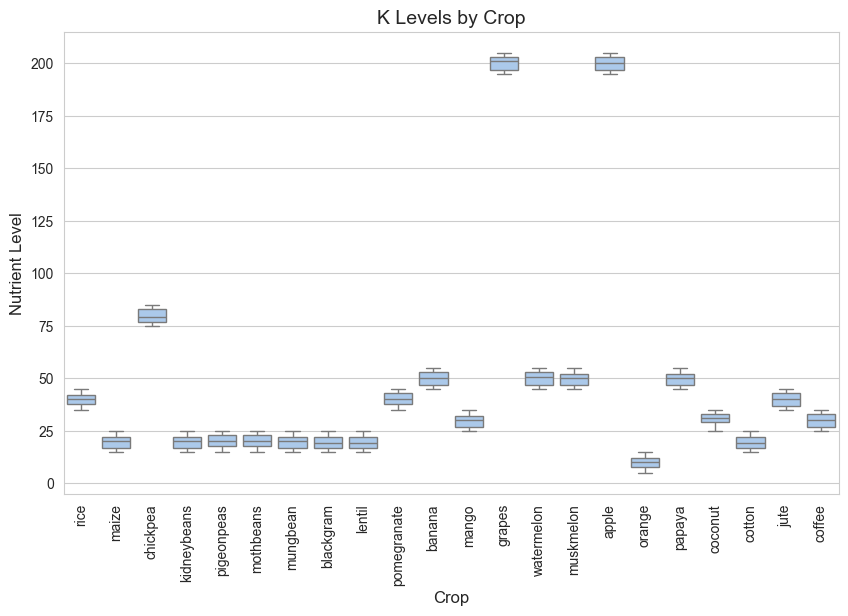

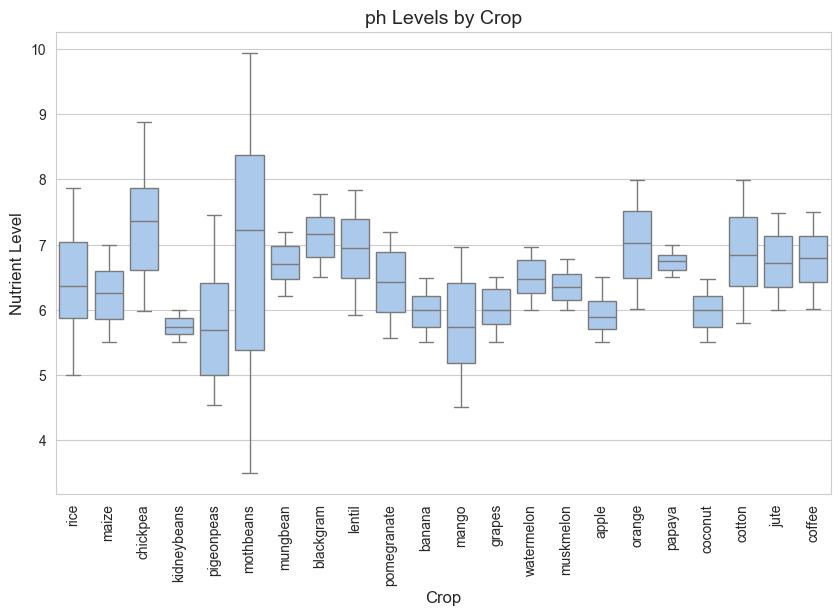

In [23]:
# Create a figure for each nutrient
nutrients = ['N', 'P', 'K', 'ph']

for nutrient in nutrients:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.boxplot(data=df, x='crop', y=nutrient)
    plt.title(f'{nutrient} Levels by Crop', fontsize=14)
    plt.xlabel('Crop', fontsize=12)
    plt.ylabel('Nutrient Level', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()


Nitrogen (N):

Cotton has the highest average nitrogen requirement (117.77), while coconut and kidney beans have the lowest (21.98 and 20.75, respectively).
Banana and coffee have the least variation in nitrogen levels, as indicated by their lower standard deviations.
Phosphorus (P):

Grapes and apple have the highest average phosphorus requirements (132.53 and 134.22, respectively), while coconut has the lowest (16.93).
Banana and coffee exhibit the least variation in phosphorus levels.
Potassium (K):

Grapes and apple have the highest average potassium requirements (200.11 and 199.89, respectively).
All crops have very low variation in potassium levels, suggesting a consistent requirement across different soil samples.
pH:

Blackgram and chickpea prefer slightly more alkaline soils (average pH of 7.13 and 7.34, respectively), while kidney beans prefer slightly more acidic soils (average pH of 5.75).
Chickpea shows the highest variability in pH levels, while kidney beans show the least.
Overall:

Cotton stands out with high nitrogen needs and moderate phosphorus needs.
Grapes and apple have similar soil nutrient profiles, with high demands for phosphorus and potassium.
Coconut has notably low requirements for all nutrients.
Banana and coffee show consistent nutrient needs across various soil samples.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [16]:
from sklearn.metrics import recall_score

# Step 1: Split the dataset into features (X) and target variable (y)
X = df.drop("crop", axis=1)
y = df["crop"].values

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train multiple logistic regression models, each using a different feature as the input
best_feature = None
best_recall = 0

# Print all features with their scores
feature_scores = {}

# Loop over each column (feature) in the dataset
for feature in X.columns:
    # Create a new logistic regression model
    model = LogisticRegression()
    
    # Use the single feature for training
    X_train_feature = X_train_scaled[:, X.columns.get_loc(feature)].reshape(-1, 1)
    X_test_feature = X_test_scaled[:, X.columns.get_loc(feature)].reshape(-1, 1)
    
    # Train the model using the current feature
    model.fit(X_train_feature, y_train)

    # Step 4: Evaluate the model using the recall metric
    y_pred = model.predict(X_test_feature)
    recall = recall_score(y_test, y_pred, average='weighted')

    # Step 5: Select the feature with the highest recall score
    if recall > best_recall:
        best_recall = recall
        best_feature = feature

    # Store the score for the current feature
    feature_scores[feature] = recall

# Print all features with their scores
print("Feature Scores:")
for feature, score in feature_scores.items():
    print(f"{feature} : {score}")
    
# Print the feature with the best recall score
if best_feature is not None:
    print(f"The feature with the best recall score is: {best_feature}")


Feature Scores:
N : 0.15227272727272728
P : 0.16590909090909092
K : 0.24545454545454545
ph : 0.09772727272727273
The feature with the best recall score is: K


### Significance of the Best Recall Score for Potassium (K)
In the context of limited budget and the goal of maximizing harvest, it is crucial to identify crops that require specific treatments or attention accurately. The recall score is a relevant metric that measures the ability of a model to correctly identify positive instances (crops that need attention) out of all the actual positive instances in the dataset.

Based on the analysis conducted, the model has identified potassium (K) as the soil element with the best recall score. This indicates that the model performs well in identifying crops that require potassium treatment. By considering the best recall score for potassium, farmers can optimize resource allocation and decision-making processes. They can prioritize and allocate resources effectively to crops that need potassium treatment the most, ensuring maximum yield and minimizing waste.

### Conclusion
In conclusion, the selection of crops based on soil conditions is a critical aspect of farming. By considering the importance of potassium (K) and its impact on crop growth, farmers can make informed decisions about which crops to plant each season. The best recall score for potassium provides valuable insights into identifying crops that require potassium treatment. By optimizing resource allocation and focusing on crops that need potassium the most, farmers can maximize their harvest and minimize waste, ultimately leading to improved profitability and sustainability in agriculture.